In [794]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [795]:
#Import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_ID = train['Id']
test_ID = test['Id']

# Removing the Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [796]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [797]:
# Info for train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [798]:
# Info for the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [799]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [800]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis
##### Distribution of the Target Column (Sales)


In [801]:
sale_prices =  train['SalePrice']
sale_prices.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

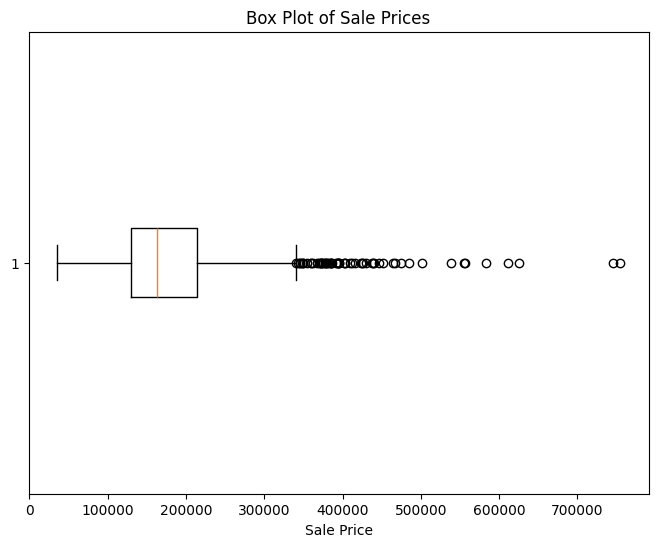

In [802]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(sale_prices, vert=False)
plt.title('Box Plot of Sale Prices')
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

# Display the plot
plt.show()

##### Since both train and test data have a categorical columns, we combined both the data in order to make sure we have all the unique classes for each of the features

In [803]:
# Combine both of train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)


In [804]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [805]:
all_data.shape

(2919, 79)

### Finding missing data

In [806]:
# Calculate missing values for each columns
missing_values_all_data =  all_data.isnull().sum() 

# Calculate the percentage of missing values for each column
missing_values_percent_all_data =  100 * all_data.isnull().sum() / len(all_data)

# Combine both missing values and percentage values dataframe
missing_values_table_all_data = pd.concat([missing_values_all_data, missing_values_percent_all_data], axis=1)

# Rename each of the columns
missing_values_table_all_data  = missing_values_table_all_data.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Remove column that does not contain any missing data
missing_values_table_all_data = missing_values_table_all_data[missing_values_table_all_data['Missing Values'] > 0]

# Sort the data from the highest missing columns
missing_values_table_all_data =  missing_values_table_all_data.sort_values(by='Missing Values', ascending=False)

In [807]:
missing_values_table_all_data

,Missing Values,% of Total Values
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


##### The PoolQC columns with the most missing data with a total of 2909 missing data. 

### Data Imputation
##### Based on the data description we can anlayse the features and impute the missing data


- PoolQC : Based on the data description, NA indicating that the house does not have a pool
- MiscFeature : Based on on the data description, NA indicating that there is no misc feature
- Alley : Based on on the data description, NA indicating that there is no alley access
- Fence : Based on on the data description, NA indicating that there is no fence 
- FireplaceQu : Based on on the data description, NA indicating that there is no fireplace 
- GarageType, GarageFinish, GarageQual and GarageCond : Based on on the data description,  for all these categorical garage-related features, NA indicating that there is no garage.
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : Based on on the data description, for all these categorical basement-related features, NaN indicating that there is no basement.

In [808]:
col_to_none = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in col_to_none:
    all_data[col].fillna("None", inplace=True)

##### Next we continue with the numerical missing data

In [809]:
# Columns with missing numerical data
missing_numerical

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageArea',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1']

In [810]:
all_data[missing_numerical]

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageArea,GarageCars,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1
0,65.0,2003.0,196.0,1.0,0.0,548.0,2.0,856.0,150.0,0.0,706.0
1,80.0,1976.0,0.0,0.0,1.0,460.0,2.0,1262.0,284.0,0.0,978.0
2,68.0,2001.0,162.0,1.0,0.0,608.0,2.0,920.0,434.0,0.0,486.0
3,60.0,1998.0,0.0,1.0,0.0,642.0,3.0,756.0,540.0,0.0,216.0
4,84.0,2000.0,350.0,1.0,0.0,836.0,3.0,1145.0,490.0,0.0,655.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,NaN,0.0,0.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0
2915,21.0,1970.0,0.0,0.0,0.0,286.0,1.0,546.0,294.0,0.0,252.0
2916,160.0,1960.0,0.0,1.0,0.0,576.0,2.0,1224.0,0.0,0.0,1224.0
2917,62.0,NaN,0.0,0.0,1.0,0.0,0.0,912.0,575.0,0.0,337.0


##### We impute the missing numerical data using the KNN imputer

In [811]:
def ImputeNumerical(all_data, numerical_input, col_to_impute):
    from sklearn.impute import KNNImputer
    
    Missing = all_data[numerical_input]
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(Missing)
    Xtrans = imputer.transform(Missing)
    df_miss = pd.DataFrame(Xtrans,columns = Missing.columns)
    all_data[col_to_impute] = df_miss[col_to_impute]
    return (all_data)

In [812]:
all_data = ImputeNumerical(all_data, all_numerical, 'LotFrontage')

##### Next we proceed with other columns with missing data with no clear indication in the data description

- GarageYrBlt, GarageArea and GarageCars : Impute the missing data with 0 since no garage meaning there is no cars in such garage.
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : Impute the missing data with 0 since missing values are likely zero for having no basement
- MasVnrArea and MasVnrType : Impute the missing data with 0 and None indicating that there is no masonry veneer for these houses
- MSZoning (The general zoning classification) : Impute the missing value with the median which is 'RL'
- MSSubClass : Impute teh missing data with None indicating that Na most likely means No building class.
- Exterior1st and Exterior2nd : Impute the missing value with the median value
- KitchenQual: Impute the missing value with the median value
- SaleType : Impute the missing value with the median value

In [813]:
# Imputing the missing data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [814]:
#Check if there is any other missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Missing Ratio  0 non-null      float64
dtypes: float64(1)
memory usage: 0.0+ bytes


## Regression
##### Tramsform numerical variable to catogorical variable

In [815]:
import datetime
Yr = all_data['YrSold'].min()
Mo = all_data['MoSold'].min()
t = datetime.datetime(Yr, Mo, 1, 0, 0)

def calculateYrMo (row):   
    return int((datetime.datetime(row.YrSold,row.MoSold,1) - t).total_seconds())

all_data['YrMoSold'] = all_data.apply(lambda row: calculateYrMo(row), axis=1)

In [816]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

##### Pick categorical columns with low number of unique variables (less than 3)

In [817]:
# Select categorical columns with low number of uuique values in a column

low_cols = [cname for cname in all_data.columns 
                        if all_data[cname].nunique() < 3 and 
                        all_data[cname].dtype == "object"]


In [818]:
# Select numeric columns
numeric_cols = [cname for cname in all_data.columns
                if all_data[cname].dtype in ['int64', 'float64']]

In [819]:
# Keep selected columns only
my_cols = low_cols + numeric_cols
all_data = all_data[my_cols].copy()

##### Set a dummy Variables for Categorical Features

In [820]:
all_data = pd.get_dummies(all_data, dtype=int)

In [821]:
all_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrMoSold,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,65750400,0,1,0,1
1,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,41904000,0,1,0,1
2,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,84153600,0,1,0,1
3,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,756.0,...,272,0,0,0,0,2678400,0,1,0,1
4,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,92016000,0,1,0,1


In [822]:
all_data.shape

(2919, 37)

In [823]:
train = all_data[:ntrain]
test = all_data[ntrain:]
X = train.values

In [824]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_train,test_size=0.20)

In [825]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [826]:
# Model Building

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [827]:
# Predicting the test results
y_pred = model.predict(X_test)

In [828]:
y_pred

array([178186.22535278, 189898.22535278,  80842.22535278, 251978.22535278,
       355402.22535278, 153850.22535278, 276170.22535278, 298698.22535278,
       280010.22535278, 188106.22535278, 163690.22535278, 252274.22535278,
       174746.22535278, 169066.22535278, 192202.22535278, 187530.22535278,
       224690.22535278, 211274.22535278,  84490.22535278, 237642.22535278,
       102282.22535278, 379466.22535278, 254026.22535278,  75466.22535278,
        79306.22535278, 163946.22535278, 198474.22535278, 152922.22535278,
       149322.22535278, 278474.22535278, 185498.22535278, 257226.22535278,
        97162.22535278, 123914.22535278, 179850.22535278, 124906.22535278,
       114589.28695786,  58013.28695786, 123866.22535278, 164554.22535278,
       190858.22535278, 111034.22535278, 145290.22535278, 137082.22535278,
       217802.22535278, 175114.22535278, 153642.22535278, 177546.22535278,
       161946.22535278, 210218.22535278, 256234.22535278, 198045.28695786,
       206986.22535278, 1

In [829]:
y_test

array([165600, 140000,  76500, 259000, 745000, 127500, 239000, 348000,
       268000, 165000, 155900, 250000, 149700, 159000, 181134, 207000,
       248000, 224000, 141000, 209500, 130500, 451950, 287090,  86000,
        79500, 107000, 175000, 153337, 173733, 228000, 181000, 392500,
       119000, 125500, 181000, 118400, 102000, 107400, 127000, 149900,
       179900,  93500, 142000, 134450, 200000, 153000, 140000, 169990,
       125000, 266500, 229000, 122000, 165150, 119000, 125000, 200000,
       109900,  55993, 193000, 163000, 270000, 190000, 118000, 113000,
       134500, 139600, 202500,  60000, 134432, 260000, 328900, 127000,
       222000, 139000, 168000, 154500, 157900, 240000, 109500, 115000,
       239900,  67000, 205000, 307000, 150000, 105000, 122500, 235000,
       128500, 280000, 215200, 148000, 125000, 127000, 270000, 225000,
       179400, 176000, 171900, 246578, 125500, 112000,  79900, 149000,
       190000, 179200, 112000, 155000, 155000,  76000, 230500, 180000,
      

In [830]:
test = test.values
new_df = sc.transform(test)
sub = model.predict(new_df)

In [831]:
sub

array([114520.08793144, 162636.08793144, 167056.08793144, ...,
       181000.08793144, 122452.08793144, 256992.08793144])

In [832]:
output = pd.DataFrame({'Id': test_ID.values, 'SalePrice': sub})
output.to_csv('submission.csv', index=False)
output.head()

,Id,SalePrice
0,1461,114520.087931
1,1462,162636.087931
2,1463,167056.087931
3,1464,194876.087931
4,1465,207076.087931
